# Part II- Data Cleaning Plan

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_raw.csv')
print(churn.head())

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2           3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3           4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4           5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

          City State                 County    Zip       Lat        Lng  ...  \
0  Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571  ...   
1  West Branch    MI  Prince of Wales-Hyder  48661  44.32893  -84.24080  ...   
2      Yamhill    OR  Prince of Wales-Hyder  97148  45.35589 -123.24657  ...   
3      Del Mar    CA  Prince of Wales-Hyder  92014  32.96687 -117.24798  ...   
4    Needville    TX  Prince of Wales-Hyder  77461  29.38012  -95.80673  ...   

   MonthlyCharge Bandwidth_GB_Year item1 item2  it

In [66]:
#check data types
print(churn.dtypes)

#Noticings: Monthly charge needs to be rounded to 2 decimal places, appears to be errors of duplication under "County"
#Below: Zip should be string, children should be integer, maybe age too?

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [67]:
print(churn.shape)

(10000, 52)


In [68]:
#Check if all items 1-8 are within the expected range

print (max(churn['item1']))
print (max(churn['item2']))
print (max(churn['item3']))
print (max(churn['item4']))
print (max(churn['item5']))
print (max(churn['item6']))
print (max(churn['item7']))
print (max(churn['item8']))

print (min(churn['item1']))
print (min(churn['item2']))
print (min(churn['item3']))
print (min(churn['item4']))
print (min(churn['item5']))
print (min(churn['item6']))
print (min(churn['item7']))
print (min(churn['item8']))

7
7
8
7
7
8
7
8
1
1
1
1
1
1
1
1


In [69]:
#check for nulls
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

0       Prince of Wales-Hyder
1       Prince of Wales-Hyder
2       Prince of Wales-Hyder
3       Prince of Wales-Hyder
4       Prince of Wales-Hyder
                ...          
9995    Prince of Wales-Hyder
9996    Prince of Wales-Hyder
9997    Prince of Wales-Hyder
9998    Prince of Wales-Hyder
9999    Prince of Wales-Hyder
Name: County, Length: 10000, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

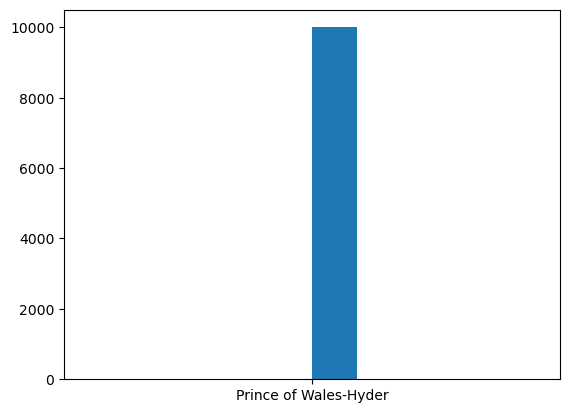

In [70]:
#to get more info on the County column

print(churn['County'])

countyx= churn['County']
plt.hist(countyx)
plt.show

In [71]:
#to see if rounding is needed for monthlycharge

churn['MonthlyCharge'].describe()

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64

In [72]:
#exploring employment
churn["Employment"].describe()

count         10000
unique            5
top       Full Time
freq           5992
Name: Employment, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

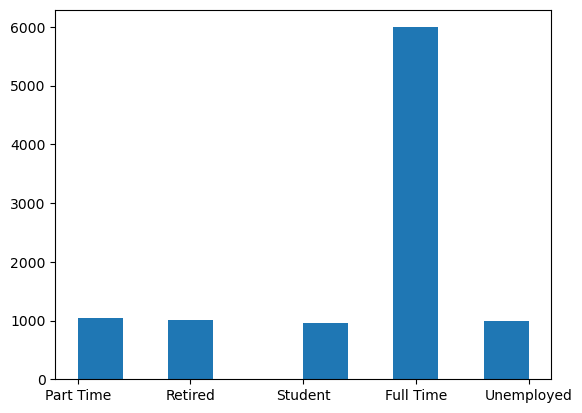

In [73]:
#exploring a bit more bc of only 5 unique. But seeing the histogram, it makes sense.
xemp = churn['Employment']
plt.hist(xemp)
plt.show

In [74]:
#exploring Tenure and Income
print(churn["Tenure"])
print(churn["Income"])

0        6.795513
1        1.156681
2       15.754144
3       17.087227
4        1.670972
          ...    
9995    68.197130
9996    61.040370
9997          NaN
9998    71.095600
9999    63.350860
Name: Tenure, Length: 10000, dtype: float64
0       28561.99
1       21704.77
2            NaN
3       18925.23
4       40074.19
          ...   
9995    55723.74
9996         NaN
9997         NaN
9998    16667.58
9999         NaN
Name: Income, Length: 10000, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

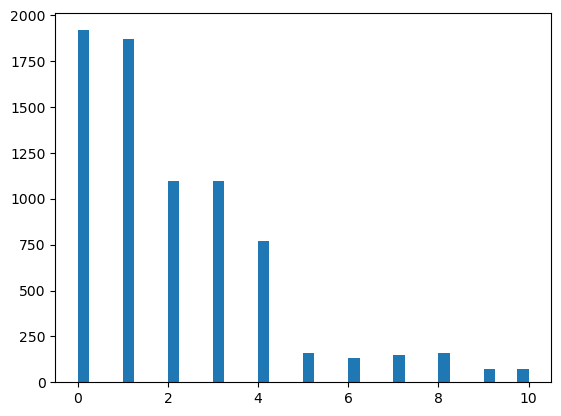

In [75]:
#Because children is float64, checking that it's all integers

xchil = churn['Children']
plt.hist(xchil,40)
plt.show

#the notch before 10 stands for null, so all integers

In [76]:
#exploring children more 

churn['Children'].describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [77]:
#detect duplicates

churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [78]:
print(churn.duplicated().value_counts())

#we see no duplicated rows

False    10000
dtype: int64


In [79]:
#detecting Nulls

churn.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

<function matplotlib.pyplot.show(close=None, block=None)>

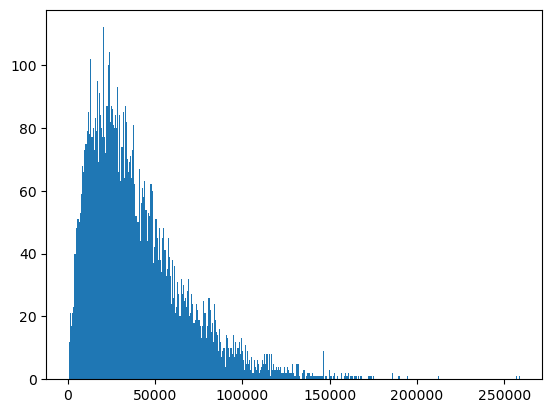

In [80]:
#Exploring income

xincome = churn["Income"]
plt.hist(xincome, bins=420)
plt.show

#you can see the extreme outliers on the right side

In [81]:
#more exploring income look at important statistical points
print(churn["Income"])
churn['Income'].describe()

0       28561.99
1       21704.77
2            NaN
3       18925.23
4       40074.19
          ...   
9995    55723.74
9996         NaN
9997         NaN
9998    16667.58
9999         NaN
Name: Income, Length: 10000, dtype: float64


count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

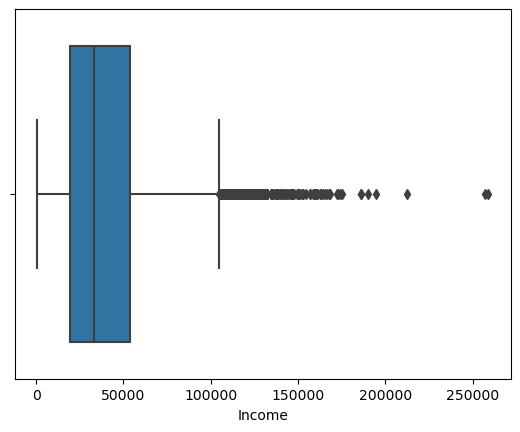

In [82]:
boxplot=sns.boxplot(x='Income',data=churn)
#while this plot indicates a number of outliers, they are all reasonable income levels, therefore I will leave them and impute the median for the nan values

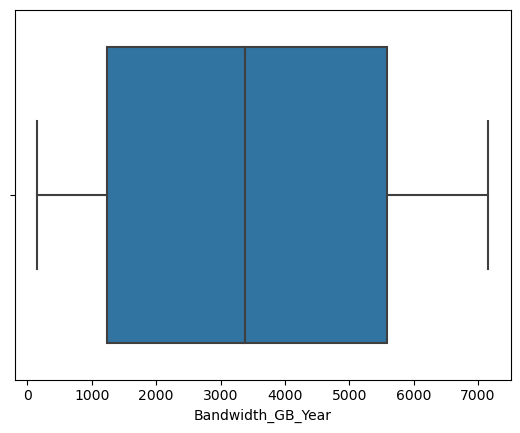

In [83]:
boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=churn)
#no outliers, looks like a normal distribution. Going to look at the stats

In [84]:
churn['Bandwidth_GB_Year'].describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [85]:
#Printing to determine what the responses look like in the "techie" column

print(churn['Techie'])
churn['Techie'].describe()

#From this I can see there are only Yes and No answers so no worries about recategorizing responses

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
9995    NaN
9996    NaN
9997     No
9998     No
9999    NaN
Name: Techie, Length: 10000, dtype: object


count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object

In [86]:
#Printing to determine what the responses look like in the "Phone" column

print(churn['Phone'])
churn['Phone'].describe()

#From this I can see there are only Yes and No answers so no worries about recategorizing responses

0       Yes
1       Yes
2       Yes
3       Yes
4        No
       ... 
9995    NaN
9996    NaN
9997    Yes
9998     No
9999    Yes
Name: Phone, Length: 10000, dtype: object


count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object

In [87]:
#Inspecting Tenure answer types
churn['Tenure'].describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

In [88]:
print(churn['Tenure'].head())

0     6.795513
1     1.156681
2    15.754144
3    17.087227
4     1.670972
Name: Tenure, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

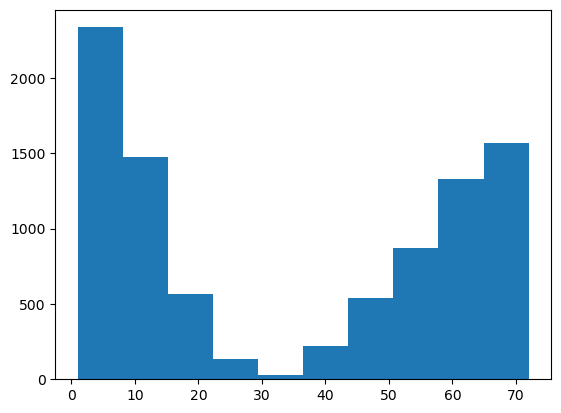

In [89]:
xtenure = churn["Tenure"]
plt.hist(xtenure)
plt.show

#this almost looks like the inverse of a normal distribution

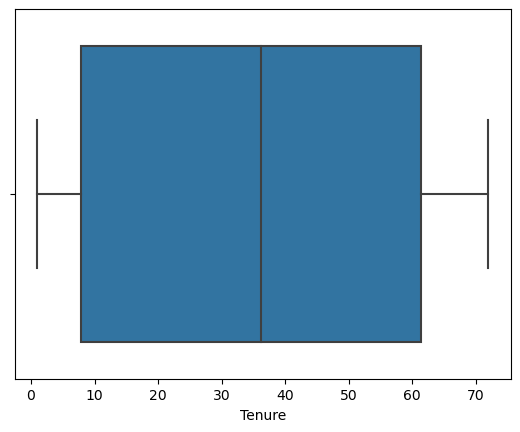

In [90]:
boxplot1=sns.boxplot(x='Tenure',data=churn)

In [91]:
churn['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

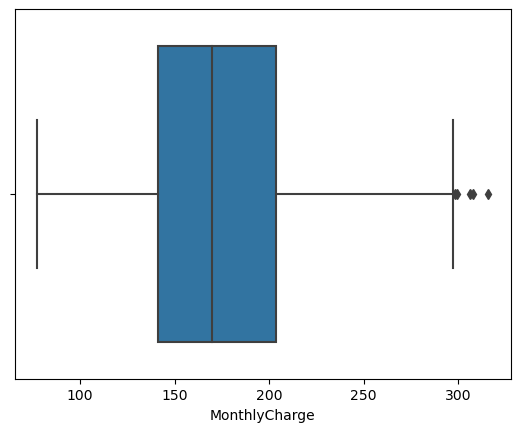

In [92]:
#checking for outliers
boxplot2=sns.boxplot(x='MonthlyCharge',data=churn)

#There are outliers in the upper range but are reasonably monthly charges so will leave them


count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

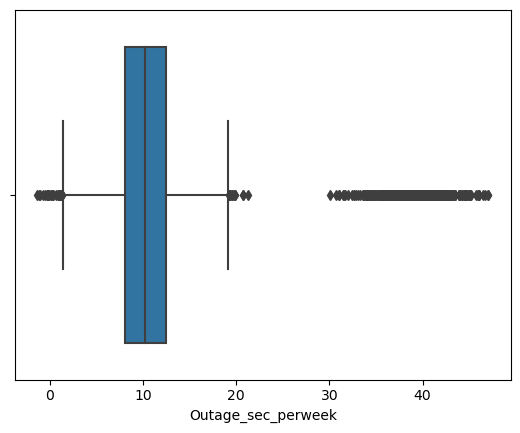

In [93]:
#Exploring Outage_sec_perweek

boxplot3=sns.boxplot(x='Outage_sec_perweek',data=churn)
churn['Outage_sec_perweek'].describe()
# the upper outliers can be legitimate but anything less than 0 must be an error

In [ ]:
#The box plot looks like it has negatives, so checking to confirm these values and how many

neg_outage = churn.loc[churn['Outage_sec_perweek'] <0]



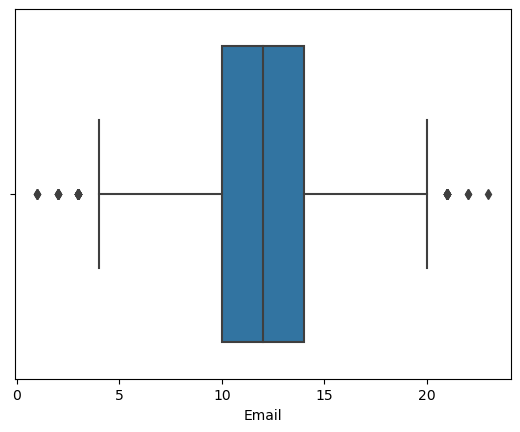

In [94]:
#explore email column

boxplot4=sns.boxplot(x='Email',data=churn)

#these outliers look reasonable

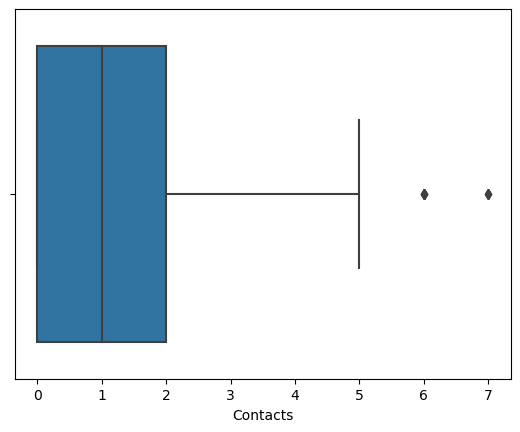

In [95]:
#explore contacts column

boxplot5=sns.boxplot(x='Contacts',data=churn)
#again, reasonable

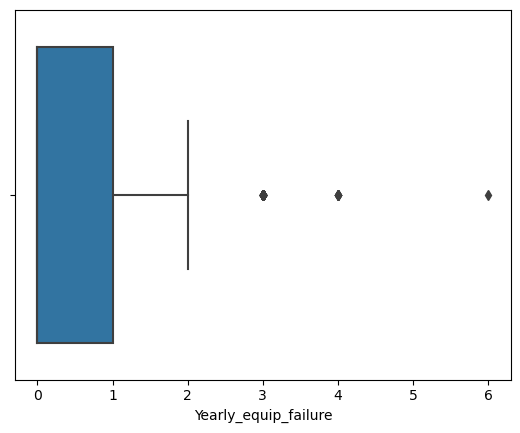

In [96]:
#explore yearly equip failure column

boxplot5=sns.boxplot(x='Yearly_equip_failure',data=churn)
#reasonable although 6 is unfortunate

# Part III- Data Cleaning

In [97]:
#fix zip data type
churn['Zip']= churn['Zip'].astype('str')

In [98]:
#drop county column
churn = churn.drop(['County'],1)
print (churn.head())

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2           3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3           4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4           5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

          City State    Zip       Lat        Lng  Population  ...  \
0  Point Baker    AK  99927  56.25100 -133.37571          38  ...   
1  West Branch    MI  48661  44.32893  -84.24080       10446  ...   
2      Yamhill    OR  97148  45.35589 -123.24657        3735  ...   
3      Del Mar    CA  92014  32.96687 -117.24798       13863  ...   
4    Needville    TX  77461  29.38012  -95.80673       11352  ...   

  MonthlyCharge Bandwidth_GB_Year item1  item2  item3 item4 item5  item6  \
0    171.449762        904.536110     5 

C:\Users\abram\AppData\Local\Temp\ipykernel_30724\129426451.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  churn = churn.drop(['County'],1)


In [99]:
#Rounded Monthy Charge Amount to actual Monthly Charge
churn["MonthlyCharge"]=churn["MonthlyCharge"].round(2)
churn['MonthlyCharge'].describe()

count    10000.000000
mean       174.076302
std         43.335462
min         77.510000
25%        141.070000
50%        169.915000
75%        203.780000
max        315.880000
Name: MonthlyCharge, dtype: float64

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

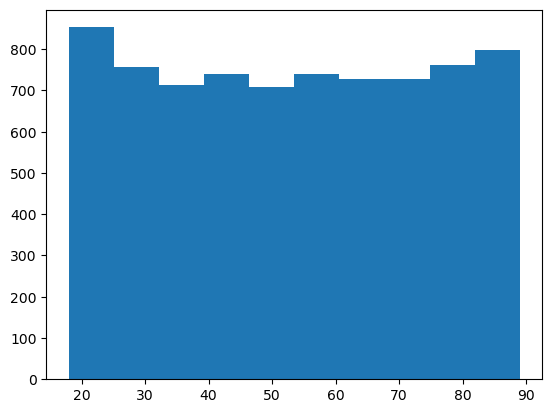

In [100]:
#Exploring age to determine remediation of NaNs.
xage = churn["Age"]
plt.hist(xage)
plt.show

churn['Age'].describe()

In [101]:
#Fill NAN Age values with median of 53

churn["Age"].fillna("53", inplace = True)
churn['Age']=churn['Age'].astype('int')
churn['Age'].describe()

count    10000.000000
mean        53.207500
std         18.003457
min         18.000000
25%         41.000000
50%         53.000000
75%         65.000000
max         89.000000
Name: Age, dtype: float64

In [102]:
#Fill Children NaN values with zero based on assumption that blank meant no children
churn["Children"].fillna("0", inplace = True)

churn['Children']=churn['Children'].astype('int')

churn['Children'].describe()

#Comparing to above, it is clear that while the mean changed significantly, it rounds to the same whole number, which is how
#children are measured. The standard deviation did not change significantly, and the 25th, 50th, and 75th percentiles
#remained the same with this imputing of zero. Hence, it was a statistically sound imputation.

count    10000.000000
mean         1.573000
std          2.075356
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [104]:
#Fill NaN Income values with median and reinstate data type
churn["Income"].fillna("33186.79", inplace = True)

churn['Income']=churn['Income'].astype('float64')

In [105]:
#Checking that it worked, and looking at impact on statistical values

churn['Income'].describe()

count     10000.000000
mean      38256.019142
std       24747.872506
min         740.660000
25%       23660.790000
50%       33186.790000
75%       45504.192500
max      258900.700000
Name: Income, dtype: float64

In [106]:
#Imputing mean for Bandwidth column and checking that it worked, as well as looking at statistical impact

churn['Bandwidth_GB_Year'].fillna(3398.842752, inplace = True)
print (churn['Bandwidth_GB_Year'].info())
churn['Bandwidth_GB_Year'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Bandwidth_GB_Year
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None


count    10000.000000
mean      3398.842752
std       2072.712613
min        155.506715
25%       1312.130487
50%       3398.842752
75%       5466.284500
max       7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [108]:
#impute No's for Techie and then check that nulls have been remedied

churn["Techie"].fillna("No", inplace = True)
print (churn['Techie'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Techie
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB
None


In [109]:
#impute No's for Phone and then check that nulls have been remedied

churn["Phone"].fillna("No", inplace = True)

print (churn['Phone'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Phone
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB
None


In [110]:
#impute Median for Tenure nulls and then check that nulls have been remedied

churn['Tenure'].fillna(36.196030, inplace = True)
churn['Tenure']=churn['Tenure'].astype('float64')
print(churn['Tenure'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Tenure
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None


In [111]:
#Drop negative values from this column (to exclude)

churn.drop(churn[churn['Outage_sec_perweek'] < 0].index, inplace = True)
churn['Outage_sec_perweek'].describe()

count    9989.000000
mean       11.466205
std         7.018413
min         0.113821
25%         8.064574
50%        10.208720
75%        12.491290
max        47.049280
Name: Outage_sec_perweek, dtype: float64

In [114]:
#Download csv for excluded values
neg_outage.to_csv(r'C:\Users\abram\Downloads\outage_excluded_values.csv',encoding='utf-8')

In [112]:


neg_outage['Outage_sec_perweek'].describe()

count    11.000000
mean     -0.578914
std       0.451739
min      -1.348571
25%      -0.943524
50%      -0.352431
75%      -0.210237
max      -0.144644
Name: Outage_sec_perweek, dtype: float64

In [113]:
#reindex after dropping values
churn = churn.reset_index()

#check that it worked
print(churn)

      index  Unnamed: 0  CaseOrder Customer_id  \
0         0           1          1     K409198   
1         1           2          2     S120509   
2         2           3          3     K191035   
3         3           4          4      D90850   
4         4           5          5     K662701   
...     ...         ...        ...         ...   
9984   9995        9996       9996     M324793   
9985   9996        9997       9997     D861732   
9986   9997        9998       9998     I243405   
9987   9998        9999       9999     I641617   
9988   9999       10000      10000      T38070   

                               Interaction          City State    Zip  \
0     aa90260b-4141-4a24-8e36-b04ce1f4f77b   Point Baker    AK  99927   
1     fb76459f-c047-4a9d-8af9-e0f7d4ac2524   West Branch    MI  48661   
2     344d114c-3736-4be5-98f7-c72c281e2d35       Yamhill    OR  97148   
3     abfa2b40-2d43-4994-b15a-989b8c79e311       Del Mar    CA  92014   
4     68a861fd-0d20-4e51-a587-8a90

In [115]:
#Download churn clean data

clean_churn=churn

clean_churn.to_csv(r'C:\Users\abram\Downloads\cleaned_churn.csv',encoding='utf-8')

# Primary Component Analysis

In [116]:
from sklearn.decomposition import PCA

In [ ]:
churn_pca=churn[['Children','Age','Income','Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year','item1','item2', 'item3','item4','item5','item6', 'item7','item8']]

In [117]:
#scaling

churn_pca_normalized= (churn_pca-churn_pca.mean())/churn_pca.std()

In [118]:
#continuing normalization

pca=PCA(n_components=churn_pca.shape[1])
pca.fit(churn_pca_normalized)
PCA(n_components=18)
churn_pca2=pd.DataFrame(pca.transform(churn_pca_normalized), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [119]:
#Loadings

loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'], index=churn_pca_normalized.columns)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Children,-0.000127,-0.003707,0.009650,0.048254,0.580479,-0.067575,0.104545,0.542321,0.126774,-0.575421,0.021837,0.031166,-0.037919,-0.017182,0.010657,0.013142,-0.010414,-0.015629
Age,0.004819,-0.014031,-0.015891,-0.049796,-0.429316,0.493176,-0.103378,0.354325,-0.567591,-0.305942,0.112248,-0.062008,0.010643,-0.001526,-0.013298,0.007930,0.015786,0.021703
Income,-0.000252,0.008190,0.022572,0.001571,0.264997,0.325925,0.764316,0.093206,-0.234880,0.406674,-0.073221,0.010925,-0.062010,-0.004610,-0.000687,0.013340,0.004925,0.001355
Outage_sec_perweek,-0.013721,0.017600,-0.048291,0.704053,0.023401,0.017670,0.017458,-0.023752,0.022932,0.085025,0.691285,-0.115187,0.012543,-0.013659,-0.019075,0.011264,-0.004090,0.000749
Email,0.008571,-0.021745,-0.005390,0.055145,-0.266641,-0.570920,0.004237,0.650859,-0.120585,0.393212,-0.043807,0.060505,-0.017546,-0.017449,0.005961,-0.017028,0.000838,0.005244
Contacts,-0.008418,0.004163,-0.010439,-0.014035,-0.474543,0.285543,0.278978,0.234513,0.742115,-0.073328,0.013230,0.037428,-0.035742,-0.004163,-0.025702,0.020087,-0.001396,-0.002632
Yearly_equip_failure,-0.008037,0.015500,0.007812,0.060940,0.311610,0.483975,-0.557386,0.289131,0.179426,0.471118,-0.120735,0.028775,0.004927,-0.015100,-0.000831,0.007095,-0.021273,-0.002451
Tenure,-0.011210,0.700775,-0.073950,-0.058628,-0.014727,-0.009226,-0.003095,0.015077,-0.019370,0.005870,0.038543,0.000802,-0.010181,0.007334,-0.012352,0.006637,0.005449,-0.705028
MonthlyCharge,-0.000447,0.043719,-0.025452,0.695544,-0.109385,0.025743,0.022401,-0.056418,-0.062197,-0.140181,-0.684463,0.046301,0.009327,-0.012963,0.002274,0.021212,-0.013077,-0.048098
Bandwidth_GB_Year,-0.013063,0.702463,-0.076288,-0.009126,0.004720,-0.016756,0.002534,0.009476,0.001611,-0.009635,-0.011060,0.012461,0.002387,0.003434,-0.001816,-0.008105,0.006837,0.706800


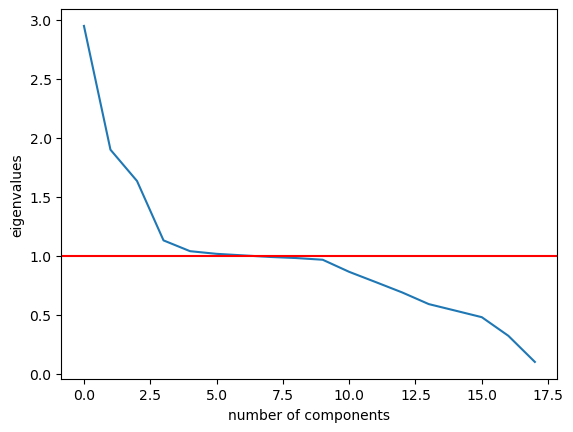

In [120]:
#Scree plot of eigenvalues

cov_matrix=np.dot(churn_pca_normalized.T, churn_pca_normalized)/churn_pca.shape[0]
eigenvalues=[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel("number of components")
plt.ylabel("eigenvalues")
plt.axhline(y=1, color="red")
plt.show()

